In [1]:
#导入常用的数据分析工具包
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
#导入影评数据集
from keras.datasets import imdb
(X_train,y_train),(X_test,y_test) = imdb.load_data()

## 1.数据理解

In [3]:
#查看数据集的规模
print('训练集的大小:',X_train.shape)
print('训练标签的大小:',y_train.shape)
print('测试集的大小:',X_test.shape)
print('测试标签的大小:',y_test.shape)

训练集的大小: (25000,)
训练标签的大小: (25000,)
测试集的大小: (25000,)
测试标签的大小: (25000,)


In [4]:
print(X_train[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 36893, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 46151, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [5]:
print(y_train[1])

0


imdb数据集是对原始数据集处理之后的数据集，每一个文本内容都是一段数字序列。标签0表示消极，1表示积极。

In [6]:
x = np.concatenate((X_train,X_test),axis = 0)
y = np.concatenate((y_train,y_test),axis = 0)

In [7]:
print(x.shape)

(50000,)


In [8]:
#查看这50000个文本，每个文本的长度
text_length = [len(word) for word in x]

In [9]:
print('文本长度的均值:',np.mean(text_length))
print('文本长度的标准差:',np.std(text_length))
print('文本长度的最小值:',np.min(text_length))
print('文本长度的最大值:',np.max(text_length))

文本长度的均值: 234.75892
文本长度的标准差: 172.91149458735703
文本长度的最小值: 7
文本长度的最大值: 2494


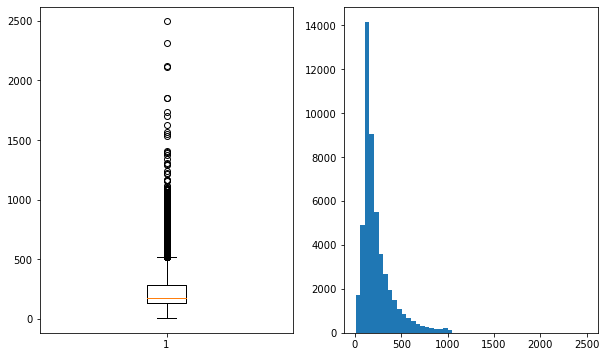

In [10]:
#可视化文本长度的分布
text_length = np.array(text_length)

plt.figure(figsize = (10,6))
plt.subplot(121)
plt.boxplot(text_length)

plt.subplot(122)
plt.hist(text_length,bins = 50)

plt.show()

## 2.数据准备

- 采用词嵌入模型，将文本中的每一个单词映射到高维向量空间中。

In [17]:
#指定向量空间中词语的数量
top_words = 200000
#指定每个文本的长度
max_words = 500
#指定经过词嵌变换后的输出向量维度
out_dimension = 32

#限定样本的长度
X_train = sequence.pad_sequences(X_train,maxlen = max_words)
X_test = sequence.pad_sequences(X_test,maxlen = max_words)



## 3.构建卷积神经网络对文本进行分类

In [18]:
#指定向量空间中词语的数量
top_words = 200000
#指定每个文本的长度
max_words = 500
#指定经过词嵌变换后的输出向量维度
out_dimension = 32
#指定批的大小
batch_size = 256
#指定训练的轮次
epochs = 10

In [19]:
model = Sequential()
#添加嵌入层
model.add(Embedding(top_words,out_dimension,input_length = max_words))
#添加卷积层
model.add(Conv1D(filters = 32,kernel_size = 3,padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())

#添加全连接层
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           6400000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2048256   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 8,451,617
Trainable params: 8,451,617
Non-trainable params: 0
____________________________________________

In [21]:
#配置该模型
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['acc'])

In [22]:
#训练样本数据
history = model.fit(X_train,y_train,batch_size = batch_size,epochs = epochs,validation_split = 0.25,verbose = 2)

Epoch 1/10
74/74 - 17s - loss: 0.6114 - acc: 0.6356 - val_loss: 0.5773 - val_acc: 0.6933
Epoch 2/10
74/74 - 17s - loss: 0.2803 - acc: 0.8897 - val_loss: 0.3381 - val_acc: 0.8584
Epoch 3/10
74/74 - 16s - loss: 0.1692 - acc: 0.9339 - val_loss: 0.2838 - val_acc: 0.8885
Epoch 4/10
74/74 - 17s - loss: 0.1064 - acc: 0.9633 - val_loss: 0.3154 - val_acc: 0.8920
Epoch 5/10
74/74 - 17s - loss: 0.0712 - acc: 0.9755 - val_loss: 0.3154 - val_acc: 0.8930
Epoch 6/10
74/74 - 17s - loss: 0.0400 - acc: 0.9875 - val_loss: 0.3594 - val_acc: 0.8893
Epoch 7/10
74/74 - 17s - loss: 0.0251 - acc: 0.9916 - val_loss: 0.4258 - val_acc: 0.8869
Epoch 8/10
74/74 - 17s - loss: 0.0125 - acc: 0.9963 - val_loss: 0.4921 - val_acc: 0.8885
Epoch 9/10
74/74 - 17s - loss: 0.0089 - acc: 0.9977 - val_loss: 0.5576 - val_acc: 0.8854
Epoch 10/10
74/74 - 17s - loss: 0.0084 - acc: 0.9980 - val_loss: 0.6519 - val_acc: 0.8832


## 4.绘制模型的训练结果

Text(0.5, 1.0, 'The loss changes with training epochs')

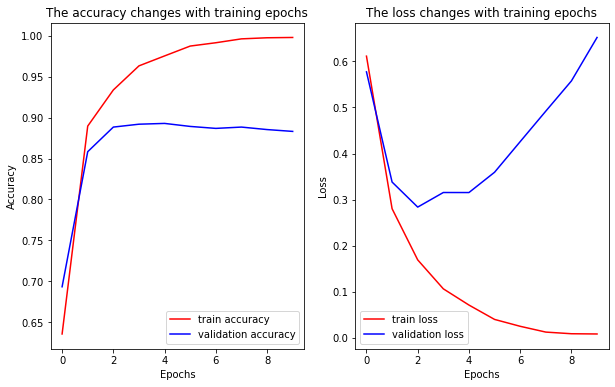

In [27]:
plt.figure(figsize = (10,6))
plt.subplot(121)
plt.plot(history.history['acc'],'r-',label = 'train accuracy')
plt.plot(history.history['val_acc'],'b-',label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs');plt.ylabel('Accuracy');plt.title('The accuracy changes with training epochs')

plt.subplot(122)
plt.plot(history.history['loss'],'r-',label = 'train loss')
plt.plot(history.history['val_loss'],'b-',label = 'validation loss')
plt.legend()
plt.xlabel('Epochs');plt.ylabel('Loss');plt.title('The loss changes with training epochs')

由上面的训练结果可以看出，随着训练轮次的增加，训练精度在不断提高，训练损失在不断下降。但是在验证集上的表现，随着训练轮次的增加，验证精度不在提高，验证损失过了最低点之后持续上升，说明该模型发生了过拟合现象。

## 5.使用处理序列数据最主流的LSTM模型

In [30]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(top_words,out_dimension,input_length = max_words))
#添加LSTM层
model_lstm.add(LSTM(units = 100))
#添加全连接层
model_lstm.add(Dense(1,activation = 'sigmoid'))

#配置该神经网络
model_lstm.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics = ['acc'])

In [31]:
history = model_lstm.fit(X_train,y_train,batch_size = batch_size,epochs = epochs,validation_split = 0.25,verbose = True)

Epoch 1/10
74/74 [==============================] - 290s 4s/step - loss: 0.6037 - acc: 0.6970 - val_loss: 0.4627 - val_acc: 0.8133
Epoch 2/10
74/74 [==============================] - 347s 5s/step - loss: 0.3591 - acc: 0.8530 - val_loss: 0.3438 - val_acc: 0.8622
Epoch 3/10
74/74 [==============================] - 349s 5s/step - loss: 0.2503 - acc: 0.9069 - val_loss: 0.4239 - val_acc: 0.7946
Epoch 4/10
74/74 [==============================] - 743s 10s/step - loss: 0.2034 - acc: 0.9262 - val_loss: 0.3150 - val_acc: 0.8682
Epoch 5/10
74/74 [==============================] - 257s 3s/step - loss: 0.1577 - acc: 0.9424 - val_loss: 0.4309 - val_acc: 0.8818
Epoch 6/10
74/74 [==============================] - 358s 5s/step - loss: 0.1182 - acc: 0.9600 - val_loss: 0.4249 - val_acc: 0.8430
Epoch 7/10
74/74 [==============================] - 370s 5s/step - loss: 0.0898 - acc: 0.9694 - val_loss: 0.3469 - val_acc: 0.8822
Epoch 8/10
74/74 [==============================] - 369s 5s/step - loss: 0.0781 - 

Text(0.5, 1.0, 'The loss changes with training epochs')

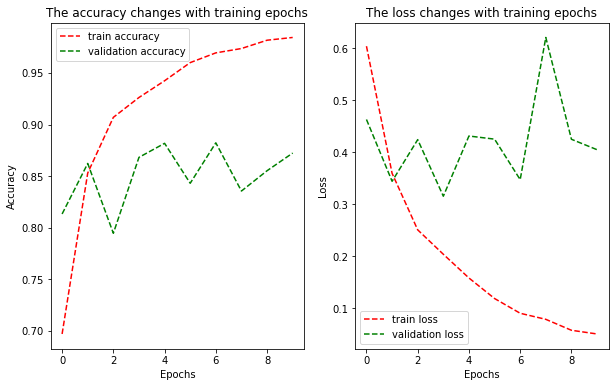

In [32]:
#可视化模型的结果

plt.figure(figsize = (10,6))
plt.subplot(121)
plt.plot(history.history['acc'],'r--',label = 'train accuracy')
plt.plot(history.history['val_acc'],'g--',label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs');plt.ylabel('Accuracy');plt.title('The accuracy changes with training epochs')

plt.subplot(122)
plt.plot(history.history['loss'],'r--',label = 'train loss')
plt.plot(history.history['val_loss'],'g--',label = 'validation loss')
plt.legend()
plt.xlabel('Epochs');plt.ylabel('Loss');plt.title('The loss changes with training epochs')

由上图的训练结果可以看出，模型在训练集上的精度持续提高，在验证集上的精度曲线了较大的波动。模型仍然存在过拟合现象。

## 6.结合CNN和LSTM，并加入Dropout层防止过拟合

In [34]:
final_model = Sequential()
final_model.add(Embedding(top_words,out_dimension,input_length = max_words))
#添加全连接层
final_model.add(Conv1D(filters = 32,kernel_size = 3,padding = 'same',activation = 'relu'))
final_model.add(MaxPooling1D(pool_size = 2))

#添加LSTM层
final_model.add(LSTM(units = 100))
final_model.add(Dense(1,activation = 'sigmoid'))
final_model.add(Dropout(0.3))

In [35]:
#配置该网络
final_model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['acc'])

In [36]:
history = final_model.fit(X_train,y_train,batch_size = batch_size,epochs = epochs,validation_split = 0.25,verbose = 2)

Epoch 1/10
74/74 - 152s - loss: 2.7036 - acc: 0.5732 - val_loss: 0.6265 - val_acc: 0.5078
Epoch 2/10
74/74 - 156s - loss: 2.5506 - acc: 0.7197 - val_loss: 0.4525 - val_acc: 0.8419
Epoch 3/10
74/74 - 150s - loss: 2.5259 - acc: 0.7650 - val_loss: 0.4518 - val_acc: 0.7998
Epoch 4/10
74/74 - 155s - loss: 2.5048 - acc: 0.7913 - val_loss: 0.4627 - val_acc: 0.8237
Epoch 5/10
74/74 - 158s - loss: 2.4846 - acc: 0.7915 - val_loss: 0.4555 - val_acc: 0.8013
Epoch 6/10
74/74 - 158s - loss: 2.4964 - acc: 0.8094 - val_loss: 0.3273 - val_acc: 0.8808
Epoch 7/10
74/74 - 159s - loss: 2.4066 - acc: 0.8187 - val_loss: 0.5415 - val_acc: 0.8171
Epoch 8/10
74/74 - 158s - loss: 2.4020 - acc: 0.8235 - val_loss: 0.3985 - val_acc: 0.8664
Epoch 9/10
74/74 - 159s - loss: 2.3849 - acc: 0.8293 - val_loss: 0.3927 - val_acc: 0.8638
Epoch 10/10
74/74 - 159s - loss: 2.4168 - acc: 0.8272 - val_loss: 0.3682 - val_acc: 0.8712


Text(0.5, 1.0, 'The loss changes with training epochs')

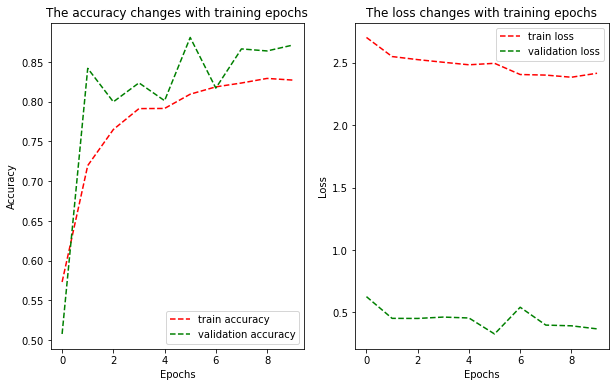

In [37]:
#可视化模型的结果

plt.figure(figsize = (10,6))
plt.subplot(121)
plt.plot(history.history['acc'],'r--',label = 'train accuracy')
plt.plot(history.history['val_acc'],'g--',label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs');plt.ylabel('Accuracy');plt.title('The accuracy changes with training epochs')

plt.subplot(122)
plt.plot(history.history['loss'],'r--',label = 'train loss')
plt.plot(history.history['val_loss'],'g--',label = 'validation loss')
plt.legend()
plt.xlabel('Epochs');plt.ylabel('Loss');plt.title('The loss changes with training epochs')

由上图结果可知，使用CNN+LSTM对文本数据进行分类，效果还是非常的不错。再次建议大家使用callbacks回调函数对最好的模型进行保存。

In [38]:
#使用训练好的数据对测试集进行预测
y_pred = final_model.predict(X_test)

In [46]:
y_pred = np.where(y_pred>0.5,1,0)

In [62]:
print('模型的预测精度:',sum(y_pred.squeeze() == y_test)/len(y_test))

模型的预测精度: 0.84856


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     12500
           1       0.90      0.78      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



综合accuracy,precision,recall,f1-score等指标，我们训练出来的final_model的效果还不错。